In [266]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [267]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [268]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.model_selection import validation_curve
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display_html

In [269]:
#pip install --upgrade jinja2

### Область работы 2 (поиск  модели .... )

In [270]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [271]:
wine_df=pd.read_csv(path_train)
wine_df['quality'] = [ 1 if x>=7 else 0 for x in wine_df.quality] #разделяем вино на хорошее и плохое
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,0


In [272]:
X = wine_df.iloc[:,:-1].values  # желательно не оставлять Pandas !!! так как y_test - Pandas,  y_predict - numpy
y = wine_df.iloc[:,-1].values



In [273]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [274]:
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1725.0,6.821797,0.853886,3.90000,6.30000,6.8000,7.3000,11.80000
volatile acidity,1725.0,0.283849,0.106090,0.08500,0.21000,0.2700,0.3300,1.10000
citric acid,1725.0,0.332545,0.122279,0.00000,0.27000,0.3200,0.3800,1.66000
residual sugar,1725.0,5.725652,4.570812,0.60000,1.60000,4.6000,8.7000,20.70000
chlorides,1725.0,0.044460,0.021236,0.01200,0.03400,0.0410,0.0490,0.29000
free sulfur dioxide,1725.0,34.615072,16.751535,3.00000,23.00000,33.0000,45.0000,124.00000
total sulfur dioxide,1725.0,135.248116,42.848854,10.00000,105.00000,130.0000,164.0000,366.50000
density,1725.0,0.993532,0.002830,0.98711,0.99132,0.9932,0.9955,1.00182
pH,1725.0,3.201449,0.151395,2.83000,3.10000,3.1900,3.3000,3.82000
sulphates,1725.0,0.492394,0.121452,0.22000,0.40000,0.4800,0.5600,1.08000


In [275]:
wine_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1720    False
1721    False
1722    False
1723    False
1724    False
Length: 1725, dtype: bool

In [276]:
for col in wine_df.columns:
    if wine_df[col].isnull().sum() > 0:
        wine_df[col] = wine_df[col].fillna(wine_df[col].mean())
wine_df.isnull().sum().sum()

0

In [277]:
#path_test='test.csv'
#wine_test=pd.read_csv(path_test)
#wine_test.duplicated()

In [278]:
# Missing Values
print(wine_df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [279]:
wine_df['quality'].value_counts()

quality
0    1107
1     618
Name: count, dtype: int64

In [280]:
y = np.array(wine_df['quality'])

X = wine_df.drop(['quality'], axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,0.99380,3.25,0.49,9.6
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,0.99200,3.13,0.57,12.3
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,0.99610,3.22,0.43,9.3
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,0.98953,3.24,0.37,12.0
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4
...,...,...,...,...,...,...,...,...,...,...,...
1720,6.9,0.39,0.22,4.3,0.030,10.0,102.0,0.99300,3.00,0.87,11.6
1721,6.4,0.34,0.10,1.1,0.048,19.0,84.0,0.99270,3.21,0.38,9.8
1722,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5
1723,5.9,0.17,0.29,3.1,0.030,32.0,123.0,0.98913,3.41,0.33,13.7


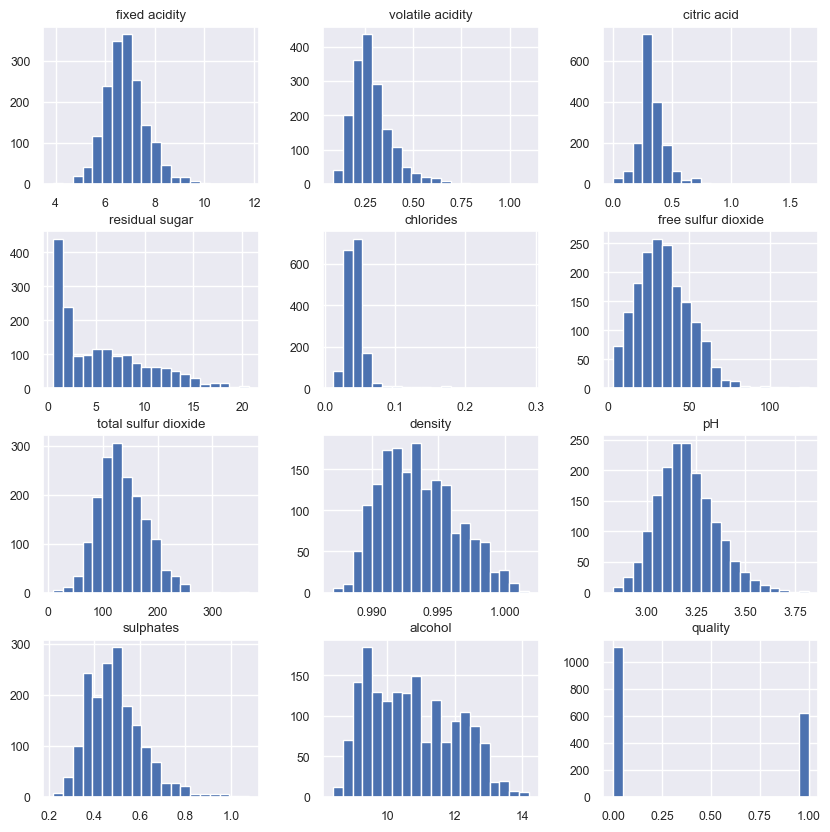

In [281]:
wine_df.hist(bins=20, figsize=(10, 10))
plt.show()

In [282]:
#Делим на третировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, 
                                                     test_size=0.25, stratify=y)
X_train.shape, X_test.shape

((1293, 11), (432, 11))

In [283]:
scaler = MinMaxScaler() # используем функцию масштабирования
scaler.fit(X_train) 
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('regressor',     KNeighborsRegressor(n_neighbors=4))])


val_score = cross_val_score(pipe, X_train, y_train, cv = 5)
val_score

array([0.16447323, 0.07561557, 0.23947691, 0.14667905, 0.19359512])

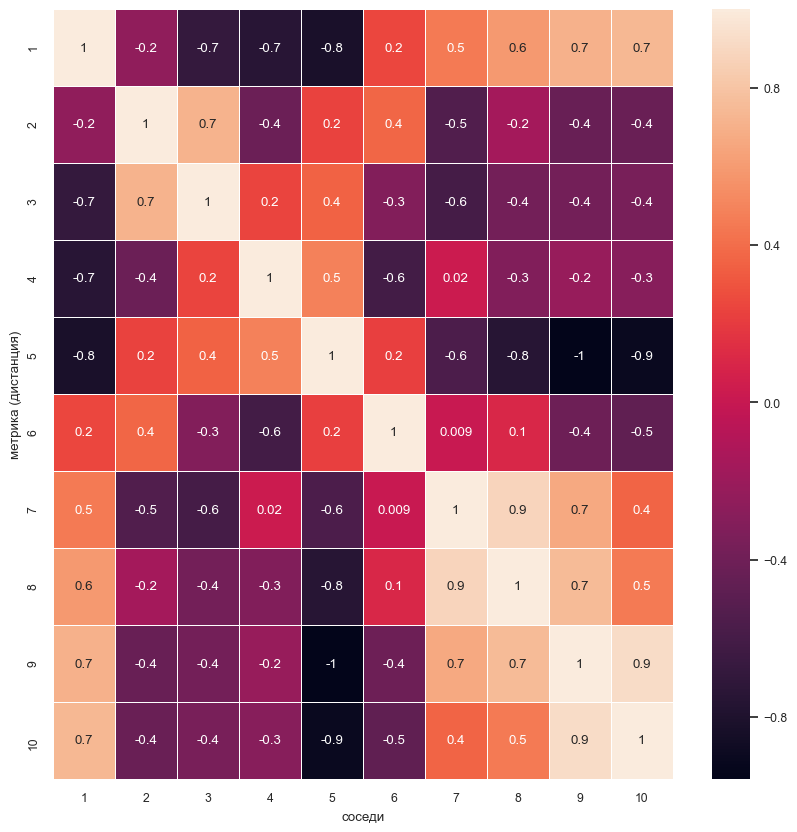

In [284]:
np.bool=np.bool_
kfold = KFold(n_splits=10, shuffle=True, random_state = 42)

range_col = np.arange(1,11)
range_ind = np.arange(1,6)

grid_2d = [[np.mean(cross_val_score(
    Pipeline([
            ('preprocessing', RobustScaler()), 
            ('regressor',     KNeighborsRegressor(n_neighbors = n, p = k, weights = 'distance')
                   )]),
    X_train, y_train, cv = kfold)) for n in range_col] for k in range_ind]

prid_pd = pd.DataFrame(grid_2d, columns = range_col, index = range_ind)
fig, ax = plt.subplots(figsize=(10,10))   
sns.set(font_scale=0.8)
s = sns.heatmap(prid_pd.corr(), annot=True, linewidths=.5,fmt='.1g')
s.set(xlabel='соседи', ylabel='метрика (дистанция)');


In [285]:
#Контейнер
fin_pipe =  Pipeline([
            ('preprocessing', RobustScaler()), 
            ('regressor',     KNeighborsRegressor(n_neighbors = 2, p = 1, weights = 'distance'))
            ])
fin_pipe.fit(X_train, y_train)
fin_pipe.score(X_test,y_test)

0.15837386902263662

In [286]:
pipe_1 = make_pipeline(Normalizer(),   KNeighborsClassifier(n_neighbors = 2, p=1))
#pipe_2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors =12, p=6, weights = 'distance'))
#pipe_3 = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors= 1, p = 3, weights = 'distance'))

pipe_1.fit(X_train,y_train)
#pipe_2.fit(X_train,y_train)
#pipe_3.fit(X_train,y_train)

y_pred_1 = pipe_1.predict(X_test)
#y_pred_2 = pipe_2.predict(X_test)
#y_pred_3 = pipe_3.predict(X_test)

print("По умолчанию мерикa accuracy")
print("Тренировака: ", pipe_1.score(X_train,y_train), "   Тест : ", pipe_1.score(X_test,y_test))
#print("Тренировака: ", pipe_2.score(X_train,y_train), "   Тест : ", pipe_2.score(X_test,y_test))
#print("Тренировака: ", pipe_3.score(X_train,y_train), "   Тест : ", pipe_3.score(X_test,y_test))

По умолчанию мерикa accuracy
Тренировака:  0.8321732405259087    Тест :  0.6782407407407407


In [287]:
#from sklearn.metrics import classification_report

#print(classification_report(y_test, y_pred_1))
#print(classification_report(y_test, y_pred_2))
#print(classification_report(y_test, y_pred_3))

In [288]:
#Перемасштабирование
scaler = MinMaxScaler()
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.521
тестовый: 0.252


In [289]:
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)
y_pred = knk.predict(X_test)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))

Правильность на тестовом наборе: 0.713


In [290]:
from sklearn.model_selection import GridSearchCV

knk = KNeighborsClassifier()
param_grid = [{
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'p': [1,2,3]
}]

cv = KFold()

grid = GridSearchCV(knk, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3]}],
             return_train_score=True)

In [291]:
grid.cv_results_

{'mean_fit_time': array([0.01179152, 0.01076083, 0.01092949, 0.0108459 , 0.0107605 ,
        0.01047072, 0.01056099, 0.01076465, 0.01096768, 0.01076245,
        0.01077871, 0.01026244, 0.01016302, 0.01056223, 0.01060257,
        0.01051097, 0.01075826, 0.01139274, 0.01079507, 0.00992055,
        0.01058207, 0.0109766 , 0.01096268, 0.0109581 , 0.01076179,
        0.01056523, 0.01158981, 0.01036429, 0.01055217, 0.01077914]),
 'std_fit_time': array([2.18770093e-03, 3.98820465e-04, 3.34641858e-05, 3.50636620e-04,
        4.02194106e-04, 1.02461508e-03, 4.91162920e-04, 4.02649733e-04,
        1.01078231e-05, 3.99828114e-04, 4.07568019e-04, 1.47081000e-03,
        4.35787748e-04, 4.84007671e-04, 5.24804658e-04, 4.50857347e-04,
        4.00263388e-04, 7.87964085e-04, 3.83235522e-04, 1.02015366e-03,
        8.05627359e-04, 3.03634836e-05, 4.42656438e-05, 5.99867968e-06,
        3.98204635e-04, 4.90239513e-04, 1.25525387e-03, 4.93896571e-04,
        5.03798891e-04, 4.07622900e-04]),
 'mean_scor

In [292]:
#feature_cols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
#              'total sulfur dioxide','density','pH','sulphates','alcohol']
#y = np.array(wine_df['quality'])
#X = wine_df[feature_cols]
#y = np.array(wine_df['quality'])

#X = wine_df.drop(['quality'], axis=1)
#clf = LogisticRegression(random_state=0, penalty=None,max_iter=10000, solver='lbfgs').fit(X, y)
clf = LogisticRegression(random_state=0, penalty=None,max_iter=10000, solver='newton-cholesky').fit(X, y)

clf.predict(X)
clf.score(X, y)

0.7634782608695653

In [293]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [294]:
logreg = LogisticRegression(random_state=16, max_iter=10000)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

target_names = ['Bad', 'Good']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         Bad       0.75      0.88      0.81       271
        Good       0.72      0.52      0.60       161

    accuracy                           0.75       432
   macro avg       0.74      0.70      0.71       432
weighted avg       0.74      0.75      0.73       432



In [295]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       271
           1       0.46      0.28      0.35       161

    accuracy                           0.61       432
   macro avg       0.56      0.54      0.53       432
weighted avg       0.58      0.61      0.58       432



In [296]:
# Create the pipeline
#pipe = Pipeline([
 #  ('preprocessing', MinMaxScaler()),
  # ('model', LogisticRegression()),
   #('metric', recall_score(y_true))
#])

# Fit the pipeline on your data
#pipe.fit(X_train, y_train)

# Predict on test data
#y_pred = pipe.predict(X_test)

#from sklearn.metrics import recall_score, precision_score, f1_score

#print('recall:    ', recall_score(y_test,  y_pred_1))



In [305]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)


model_NB = make_pipeline(MinMaxScaler(),GaussianNB())
model_NB.fit(X_train,y_train)
y_NB_pred = model_NB.predict(X_test)



df1 = pd.DataFrame(classification_report(y_test, y_NB_pred, output_dict=True)).T
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('GaussianNB')
display_html(df1_styler._repr_html_(), raw=True)

,precision,recall,f1-score,support
0,0.872902,0.657040,0.749743,554.000000
1,0.573991,0.828479,0.678146,309.000000
accuracy,0.718424,0.718424,0.718424,0.718424
macro avg,0.723446,0.742759,0.713944,863.000000
weighted avg,0.765876,0.718424,0.724107,863.000000


In [298]:

model_NB = make_pipeline(Normalizer(),GaussianNB())
model_LR = make_pipeline(StandardScaler(), LogisticRegression(solver = 'newton-cg', penalty = 'l2', C=3))
model_KNN = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 3, p=2, weights = 'distance'))

model_NB.fit(X_train,y_train)
model_LR.fit(X_train,y_train)
model_KNN.fit(X_train,y_train)

y_NB_pred = model_NB.predict(X_test)
y_LR_pred = model_LR.predict(X_test)
y_KNN_pred = model_KNN.predict(X_test)

df1 = pd.DataFrame(classification_report(y_test, y_NB_pred, output_dict=True)).T
df2 = pd.DataFrame(classification_report(y_test, y_LR_pred, output_dict=True)).T
df3 = pd.DataFrame(classification_report(y_test, y_KNN_pred, output_dict=True)).T

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('GaussianNB')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('LogisticRegression')
df3_styler = df3.style.set_table_attributes("style='display:inline'").set_caption('KNN')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_(), raw=True)

,precision,recall,f1-score,support
0,0.879154,0.525271,0.657627,554.000000
1,0.505639,0.870550,0.639715,309.000000
accuracy,0.648899,0.648899,0.648899,0.648899
macro avg,0.692397,0.697910,0.648671,863.000000
weighted avg,0.745416,0.648899,0.651213,863.000000
,precision,recall,f1-score,support
0,0.798623,0.837545,0.817621,554.000000
1,0.680851,0.621359,0.649746,309.000000
accuracy,0.760139,0.760139,0.760139,0.760139
macro avg,0.739737,0.729452,0.733684,863.000000


In [299]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
X_train = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test = scaler.transform(X_test)   # перемасштабировали тестовый набор

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(random_state=16,max_iter=10000)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)
target_names=['Bad','Good']

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))


[[331  60]
 [ 86 127]]
              precision    recall  f1-score   support

         Bad       0.79      0.85      0.82       391
        Good       0.68      0.60      0.64       213

    accuracy                           0.76       604
   macro avg       0.74      0.72      0.73       604
weighted avg       0.75      0.76      0.75       604



In [300]:
knk = KNeighborsClassifier()
knk.fit(X_train,y_train)
y_pred = knk.predict(X_test)
print('Правильность на тестовом наборе: {:.3f}'.format(np.mean(y_pred==y_test)))       

Правильность на тестовом наборе: 0.667


In [301]:
knk_train = knk.score(X_train , y_train)
knk_test = knk.score(X_test , y_test)
print("тренировочный: {:.3f}".format(knk_train))
print("тестовый:      {:.3f}".format(knk_test))

тренировочный: 0.790
тестовый:      0.667


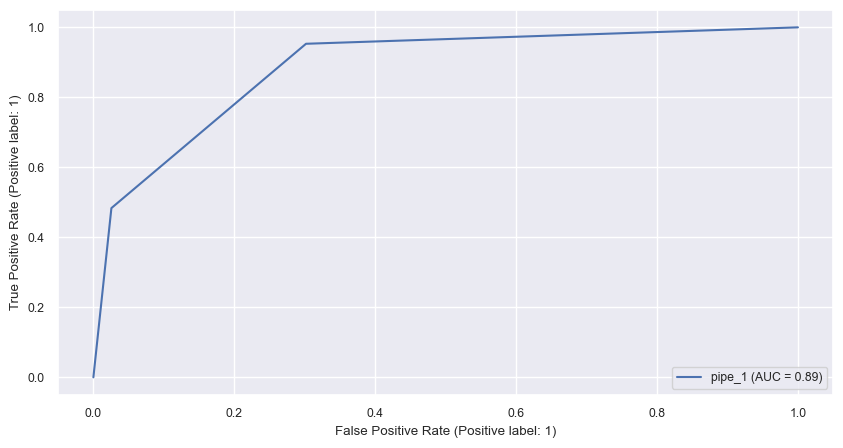

In [302]:
from sklearn.metrics import RocCurveDisplay

fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))

RocCurveDisplay.from_estimator(pipe_1, X_test, y_test, ax = ax_roc, name = 'pipe_1');

In [303]:
#подберем лучшие параметры для лог регрессии
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           LogisticRegression(max_iter=10000,penalty='l2'))])

# n_splits = 5, random_state = 42 дают не улачную комбинацию и это хорошо для разбора ошибок решетки
cv = StratifiedShuffleSplit(test_size = .3, train_size = .6, n_splits = 3, random_state = 16)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'clf__penalty': ['l2'], 
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,'clf__penalty': ['l1'], 
         'clf__solver': ['liblinear']},
    {'preprocessing': scaling,'clf__penalty': ['none'], 
         'clf__solver': ['lbfgs','newton-cg']}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv, return_train_score = True)
grid.fit(X_train, y_train)
grid    

C:\Users\Victoria\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Victoria\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Victoria\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\Victoria\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=3, random_state=16, test_size=0.3,
            train_size=0.6),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf',
                                        LogisticRegression(max_iter=10000))]),
             param_grid=[{'clf__penalty': ['l2'],
                          'clf__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                          'sag', 'saga'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['l1'], 'clf__solver': ['liblinear'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'clf__penalty': ['none'],
                          'clf__solver': ['lbfgs', 'newton-cg'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             return_train_score=True)

In [304]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,24,25,26,28,29,30,1,5,13,17,...,16,31,27,20,11,3,7,15,19,23
mean_fit_time,0.027401,0.018387,0.025249,0.034195,0.023918,0.033554,0.025634,0.017944,0.029236,0.051189,...,0.017939,0.13172,0.681076,0.039865,0.011296,0.018973,0.020913,0.017943,0.017941,0.05937
std_fit_time,0.001089,0.000414,0.002621,0.002019,0.002824,0.00047,0.000395,0.000816,0.00174,0.004503,...,0.000006,0.006804,0.23005,0.008496,0.000472,0.000028,0.000842,0.000003,0.000003,0.029635
mean_score_time,0.003989,0.00432,0.004984,0.004321,0.004319,0.004656,0.004321,0.004316,0.004651,0.005292,...,0.004317,0.005622,0.005341,0.00399,0.004971,0.004982,0.005009,0.004989,0.004986,0.004987
std_score_time,0.0,0.00047,0.000001,0.00047,0.000471,0.000464,0.000469,0.000472,0.00047,0.001211,...,0.000471,0.000501,0.000452,0.000001,0.000019,0.00001,0.000035,0.000008,0.000001,0.000817
param_clf__penalty,none,none,none,none,none,none,l2,l2,l2,l2,...,l2,none,none,l1,l2,l2,l2,l2,l2,l1
param_clf__solver,lbfgs,lbfgs,lbfgs,newton-cg,newton-cg,newton-cg,newton-cg,lbfgs,sag,saga,...,saga,newton-cg,lbfgs,liblinear,liblinear,newton-cg,lbfgs,sag,saga,liblinear
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),Normalizer(),Normalizer(),MinMaxScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...",...,"{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline..."
split0_test_score,0.771513,0.771513,0.771513,0.771513,0.771513,0.771513,0.765579,0.765579,0.765579,0.765579,...,0.753709,0.747774,0.74184,0.735905,0.64095,0.64095,0.64095,0.64095,0.64095,0.635015
split1_test_score,0.738872,0.738872,0.738872,0.738872,0.738872,0.738872,0.735905,0.735905,0.735905,0.735905,...,0.732938,0.74184,0.744807,0.72997,0.632047,0.62908,0.62908,0.62908,0.62908,0.632047
